# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

#1

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [8]:
#2
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
log_reg.score(X_test_scaled, y_test)

0.9586

In [13]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228117
         1.0       0.89      0.60      0.72     21883

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [14]:
#3

In [17]:
#4 Oversampling 
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]


In [19]:
yes_fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [20]:
train_over = pd.concat([yes_fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
30748,-0.407507,-0.186105,1.664347,-2.724100,-0.734208,-0.334746,0.734199,1.0
498729,0.260143,0.633002,2.142195,0.367094,-0.734208,-0.334746,0.734199,1.0
487954,-0.343323,0.216543,1.171570,0.367094,-0.734208,-0.334746,0.734199,1.0
600306,-0.150728,1.868913,0.797743,0.367094,-0.734208,-0.334746,0.734199,1.0
525630,1.666520,-0.139132,1.080115,0.367094,-0.734208,-0.334746,0.734199,1.0
...,...,...,...,...,...,...,...,...
749995,-0.406291,-0.092952,0.336496,-2.724100,-0.734208,-0.334746,0.734199,0.0
749996,0.213205,-0.186288,0.400063,0.367094,1.362012,-0.334746,-1.362028,0.0
749997,-0.353627,-0.086354,0.035843,0.367094,-0.734208,-0.334746,0.734199,0.0
749998,0.381296,-0.091600,0.496381,0.367094,-0.734208,-0.334746,0.734199,0.0


In [ ]:
fraud_counts.plot(kind="bar")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Counts")
plt.show()


In [24]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [25]:
log_reg = LogisticRegression()


log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [26]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228117
         1.0       0.58      0.95      0.72     21883

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [27]:
#5 Undersampling 
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.403357,-0.183434,-0.526205,-2.724100,1.362012,-0.334746,-1.362028,0.0
1,0.072548,-0.085925,-0.600340,0.367094,-0.734208,-0.334746,-1.362028,0.0
2,-0.367989,-0.164414,-0.182782,0.367094,-0.734208,-0.334746,-1.362028,0.0
3,-0.280752,-0.155587,1.049303,0.367094,-0.734208,2.987336,-1.362028,0.0
4,-0.277228,-0.162343,-0.562591,0.367094,-0.734208,-0.334746,0.734199,0.0
...,...,...,...,...,...,...,...,...
749995,-0.406291,-0.092952,0.336496,-2.724100,-0.734208,-0.334746,0.734199,0.0
749996,0.213205,-0.186288,0.400063,0.367094,1.362012,-0.334746,-1.362028,0.0
749997,-0.353627,-0.086354,0.035843,0.367094,-0.734208,-0.334746,0.734199,0.0
749998,0.381296,-0.091600,0.496381,0.367094,-0.734208,-0.334746,0.734199,0.0


In [29]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
254865,-0.166412,-0.047915,-0.360437,0.367094,-0.734208,-0.334746,0.734199,0.0
277622,-0.368728,-0.162131,-0.293422,0.367094,1.362012,-0.334746,0.734199,0.0
600299,-0.313727,-0.182604,-0.113132,0.367094,1.362012,-0.334746,0.734199,0.0
331742,-0.381153,-0.177744,-0.403048,0.367094,-0.734208,-0.334746,-1.362028,0.0
625653,-0.295020,0.040735,-0.313685,0.367094,-0.734208,-0.334746,-1.362028,0.0
...,...,...,...,...,...,...,...,...
619032,0.041956,-0.133769,-0.533631,0.367094,1.362012,-0.334746,0.734199,0.0
475489,0.489777,-0.126919,0.938224,0.367094,1.362012,-0.334746,-1.362028,0.0
450887,-0.348495,-0.087282,-0.459873,0.367094,-0.734208,-0.334746,0.734199,0.0
608876,0.152862,-0.091307,-0.308152,0.367094,1.362012,-0.334746,0.734199,0.0


In [30]:
train_under = pd.concat([no_fraud_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
254865,-0.166412,-0.047915,-0.360437,0.367094,-0.734208,-0.334746,0.734199,0.0
277622,-0.368728,-0.162131,-0.293422,0.367094,1.362012,-0.334746,0.734199,0.0
600299,-0.313727,-0.182604,-0.113132,0.367094,1.362012,-0.334746,0.734199,0.0
331742,-0.381153,-0.177744,-0.403048,0.367094,-0.734208,-0.334746,-1.362028,0.0
625653,-0.295020,0.040735,-0.313685,0.367094,-0.734208,-0.334746,-1.362028,0.0
...,...,...,...,...,...,...,...,...
749955,0.132607,0.046506,3.947910,0.367094,-0.734208,-0.334746,0.734199,1.0
749961,-0.365756,0.674058,0.818622,0.367094,-0.734208,-0.334746,0.734199,1.0
749966,-0.138692,-0.077803,1.232626,0.367094,-0.734208,-0.334746,0.734199,1.0
749977,3.802249,-0.183941,-0.244602,0.367094,-0.734208,-0.334746,0.734199,1.0


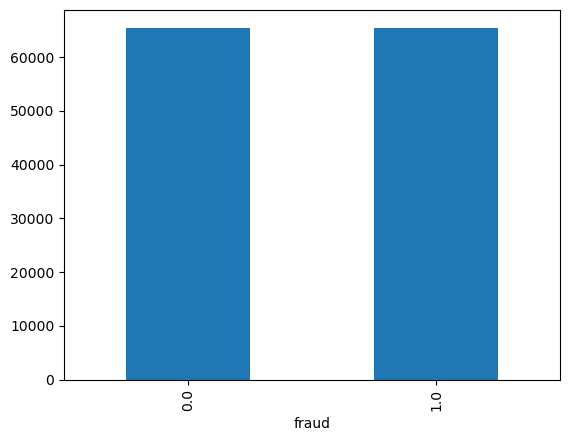

In [31]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [33]:
# separating 
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [34]:
#modeling
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [35]:
#evaluate
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228117
         1.0       0.57      0.95      0.72     21883

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [36]:
#6 SMOTE baby, yeah 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)


In [37]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [38]:
#evaluate model 
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228117
         1.0       0.58      0.95      0.72     21883

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

